In [1]:
# Instalar bibliotecas (caso necessário)
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from google.colab import drive

In [2]:
import pandas as pd

# Caminho dos arquivos após upload no Kaggle
train = pd.read_csv('/kaggle/input/titanicdados/traincariny (1).csv')
test = pd.read_csv('/kaggle/input/titanicdados/testecariny (1).csv')

# Visualizar as primeiras linhas
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


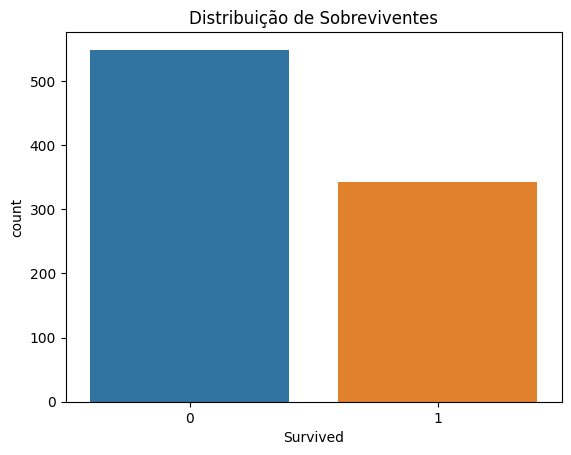

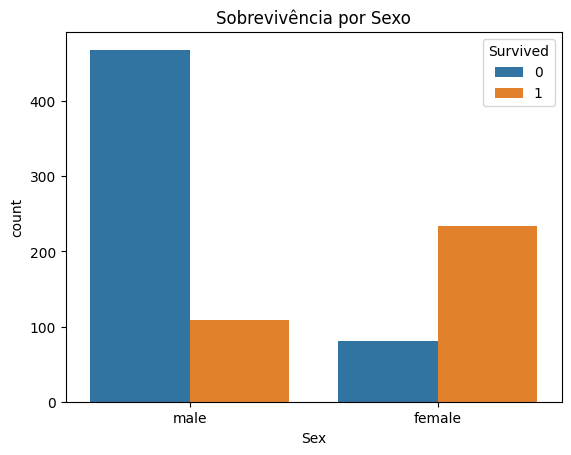

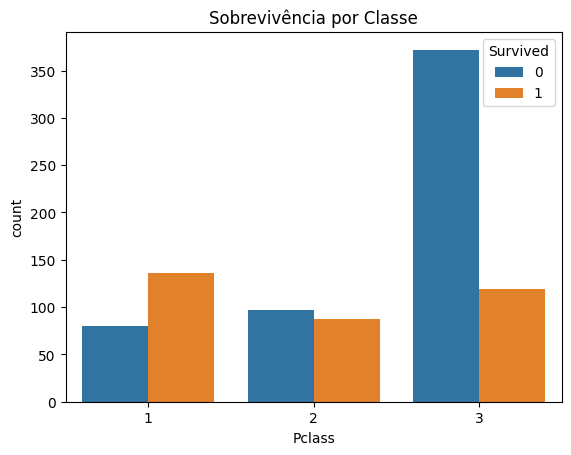

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caminho corrigido
train = pd.read_csv('/kaggle/input/titanicdados/traincariny (1).csv')

# Gráfico: Distribuição de sobreviventes
sns.countplot(data=train, x='Survived')
plt.title('Distribuição de Sobreviventes')
plt.show()

# Gráfico: Sobrevivência por sexo
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Sobrevivência por Sexo')
plt.show()

# Gráfico: Sobrevivência por classe
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Sobrevivência por Classe')
plt.show()

# Estatísticas descritivas
print(train.describe())


In [4]:
# Preenchimento de valores ausentes com verificação de existência das colunas
if 'Age' in train.columns:
    train['Age'] = train['Age'].fillna(train['Age'].median())
if 'Embarked' in train.columns:
    train['Embarked'] = train['Embarked'].fillna('S')
if 'Age' in test.columns:
    test['Age'] = test['Age'].fillna(test['Age'].median())
if 'Fare' in test.columns:
    test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Engenharia de atributos
for df in [train, test]:
    if 'SibSp' in df.columns and 'Parch' in df.columns:
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    if 'Cabin' in df.columns:
        df['Has_Cabin'] = df['Cabin'].notnull().astype(int)
    if 'Sex' in df.columns:
        df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Confirmação
print("Pré-processamento concluído.")


Pré-processamento concluído.


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Corrigir features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Has_Cabin', 'Embarked']
X = train[features]
y = train['Survived']

# Codificar variáveis categóricas
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Normalização de colunas numéricas
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
# Confirmação
print("concluído")


concluído


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Supondo que X já foi definido corretamente
X_encoded = pd.get_dummies(X)  # Codifica variáveis categóricas
y = train['Survived']          # Variável alvo

# Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

# Validação cruzada
scores = cross_val_score(model, X_encoded, y, cv=5)
print(f'Acurácia média: {scores.mean():.4f}')


Acurácia média: 0.8025


In [7]:
# Codificação das variáveis categóricas
X_encoded = pd.get_dummies(X)
y = train['Survived']

# Modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Definição dos hiperparâmetros para o grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV com validação cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_encoded, y)

# Resultados
print(f'Melhores parâmetros: {grid_search.best_params_}')
print(f'Melhor acurácia: {grid_search.best_score_:.4f}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Melhor acurácia: 0.8283


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Separar variáveis e alvo
X = train.drop(columns=['Survived', 'PassengerId'])
y = train['Survived']

X_test = test.drop(columns=['PassengerId'])

# Separar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Filtrar colunas numéricas que não sejam 100% NaN
num_cols_filtered = [col for col in num_cols if X[col].notna().any()]

# Imputar colunas numéricas com média
imputer_num = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(imputer_num.fit_transform(X[num_cols_filtered]), columns=num_cols_filtered)
X_test_num = pd.DataFrame(imputer_num.transform(X_test[num_cols_filtered]), columns=num_cols_filtered)

# Imputar colunas categóricas com valor mais frequente
imputer_cat = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(imputer_cat.fit_transform(X[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(imputer_cat.transform(X_test[cat_cols]), columns=cat_cols)

# Concatenar numéricas e categóricas
X_imputed = pd.concat([X_num, X_cat], axis=1)
X_test_imputed = pd.concat([X_test_num, X_test_cat], axis=1)

# One-hot encoding
X_train_encoded = pd.get_dummies(X_imputed)
X_test_encoded = pd.get_dummies(X_test_imputed)

# Alinhar colunas do teste com as do treino
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Definir modelo e parâmetros para grid search
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_encoded, y)

# Melhor modelo
best_model = grid_search.best_estimator_

# Previsões no conjunto de teste
predictions = best_model.predict(X_test_encoded)

# Criar arquivo de submissão
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)
submission.head()


Fitting 5 folds for each of 6 candidates, totalling 30 fits


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
